In [1]:
'''
Data Mining
Individual Project
'''

'\nData Mining\nIndividual Project\n'

In [2]:
'''
Name: Ruoxin WANG
Student ID: 2030026150
'''

'\nName: Ruoxin WANG\nStudent ID: 2030026150\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [4]:
# 0 Import Dataset.

In [5]:
# import from training and test files.
data = pd.read_csv('Dataset/training.csv')
data_test = pd.read_csv('Dataset/test.csv')

In [6]:
# 1 Exploratory Data Analysis

In [7]:
print('Shape of data: ', data.shape)
data.head()

Shape of data:  (1330, 7)


,buying,maint,doors,persons,lug_boot,safety,evaluation
0,low,vhigh,5more,more,small,low,unacc
1,high,high,2,2,big,med,unacc
2,low,vhigh,3,2,med,med,unacc
3,vhigh,low,5more,2,big,med,unacc
4,vhigh,vhigh,4,2,big,med,unacc


In [8]:
x = data.drop('evaluation', axis = 1)
y = data['evaluation']

# concate two table, to do same data pre-processing.
data_merge = pd.concat([x, data_test])

In [9]:
# get general information of x.
x.info()
x.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1330 non-null   object
 1   maint     1330 non-null   object
 2   doors     1330 non-null   object
 3   persons   1330 non-null   object
 4   lug_boot  1330 non-null   object
 5   safety    1330 non-null   object
dtypes: object(6)
memory usage: 62.5+ KB


,count,unique,top,freq
buying,1330,4,high,350
maint,1330,4,high,342
doors,1330,4,3,346
persons,1330,3,2,453
lug_boot,1330,3,med,456
safety,1330,3,low,463


In [10]:
# find out features include in x and y.
# save feature name into list.
# and save class values into labels.
feature_list = x.columns.values.tolist()
total_list = feature_list.append('evaluation')
labels = y.unique()
print('Feature in x: ', feature_list)
print('Labels in y: ', labels)

Feature in x:  ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']
Labels in y:  ['unacc' 'acc' 'good']


In [11]:
# 2 Feature Engineering

In [12]:
# find out frequency distribution of values in variables.
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']

for col in col_names:
    print(data[col].value_counts())  

high     350
vhigh    340
low      320
med      320
Name: buying, dtype: int64
high     342
vhigh    341
low      328
med      319
Name: maint, dtype: int64
3        346
2        338
4        325
5more    321
Name: doors, dtype: int64
2       453
more    441
4       436
Name: persons, dtype: int64
med      456
small    450
big      424
Name: lug_boot, dtype: int64
low     463
med     458
high    409
Name: safety, dtype: int64
unacc    968
acc      307
good      55
Name: evaluation, dtype: int64


In [13]:
# detect missing value.
data.isnull().sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
evaluation    0
dtype: int64

In [14]:
# test of independence。

In [15]:
table_sm = sm.stats.Table.from_data(data[['buying', 'evaluation']])
table_sm.table_orig

evaluation,acc,good,unacc
buying,,,
high,88,0,262
low,65,37,218
med,94,18,208
vhigh,60,0,280


In [16]:
table_sm.fittedvalues

evaluation,acc,good,unacc
buying,,,
high,80.844102,14.746807,254.909091
low,73.809166,13.463561,232.727273
med,73.809166,13.463561,232.727273
vhigh,78.537566,14.326071,247.636364


In [17]:
result  = table_sm.test_nominal_association()
print(result)

df          6
pvalue      0.0
statistic   89.35089448795459


In [18]:
import scipy.stats as stats
table_sp = pd.crosstab(data['buying'], data['safety'])
stats.chi2_contingency(table_sp)


(6.590544901879127,
 0.36037677854015265,
 6,
 array([[107.63157895, 121.84210526, 120.52631579],
        [ 98.40601504, 111.39849624, 110.19548872],
        [ 98.40601504, 111.39849624, 110.19548872],
        [104.55639098, 118.36090226, 117.08270677]]))

In [20]:
# # spilt training data into training set and validation set.
# # separate training data into training set and validation set.
# from sklearn.model_selection import train_test_split
# # data_no_header = data_encoder.reset_index(drop = True, inplace = True)
# x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.3, random_state = 7)


In [21]:
# 3 Model Training

In [22]:
# 3.1 KNN
from Model_Code.KNN import KNN

# use OneHotEncoder to encode data.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(x)
x_encoder = pd.DataFrame(enc.transform(x).toarray())

# use train_test_split to separate training set into
# training data and validation data.
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid_KNN = train_test_split(x_encoder, y, test_size = 0.3, random_state = 22)
# convert data into form that function can be used.
x_valid_np = x_valid.to_numpy()

# Fit KNN model and use it to predict result.
print('-----------KNN Model-----------')
res_KNN = []
for i in range(x_valid.shape[0]):
    res_KNN.append(KNN(x_valid_np[i], x_train.to_numpy(), y_train.to_list(), 5))
print('Done')

print(res_KNN)

-----------KNN Model-----------
Done
['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc'

In [23]:
# 3.2 Naive Bayes
from Model_Code.Bayes import Bayes
import pandas as pd
# import importlib
# importlib.reload('Model_Code.Bayes')

data = pd.read_csv('Dataset/training.csv')
b = Bayes(data)
y_valid_Bayes = b.spilt_data()
res_Bayes = b.get_result()

print(res_Bayes)

-----------Bayes Model-----------
Done
['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'acc' 'acc' 'acc' 'acc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc'
 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'good' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc'
 'acc' 'acc' 'unacc' 'good' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'

In [24]:
# 3.3 Perceptron
from Model_Code.Perceptron import Perceptron
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# use OneHotEncoder to encode data.
enc = OneHotEncoder()
enc.fit(x)
x_encoder = pd.DataFrame(enc.transform(x).toarray())

# use train_test_split to separate training set into training data and validation data.
x_train, x_valid, y_train, y_valid_Perceptron = train_test_split(x_encoder, y, test_size = 0.3, random_state = 22)

res_Perceptron = Perceptron(x_train.reset_index(drop = True),\
        y_train.reset_index(drop = True), x_valid.reset_index(drop = True), 0.2, 50)

print(res_Perceptron)

-------Perceptron-------
1/50 finished
2/50 finished
3/50 finished
4/50 finished
5/50 finished
6/50 finished
7/50 finished
8/50 finished
9/50 finished
10/50 finished
11/50 finished
12/50 finished
13/50 finished
14/50 finished
15/50 finished
16/50 finished
17/50 finished
18/50 finished
19/50 finished
20/50 finished
21/50 finished
22/50 finished
23/50 finished
24/50 finished
25/50 finished
26/50 finished
27/50 finished
28/50 finished
29/50 finished
30/50 finished
31/50 finished
32/50 finished
33/50 finished
34/50 finished
35/50 finished
36/50 finished
37/50 finished
38/50 finished
39/50 finished
40/50 finished
41/50 finished
42/50 finished
43/50 finished
44/50 finished
45/50 finished
46/50 finished
47/50 finished
48/50 finished
49/50 finished
50/50 finished
Done
['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', '

-------Decision_Tree Model-------
Training set score: 0.7970
Test set score: 0.8321
Done


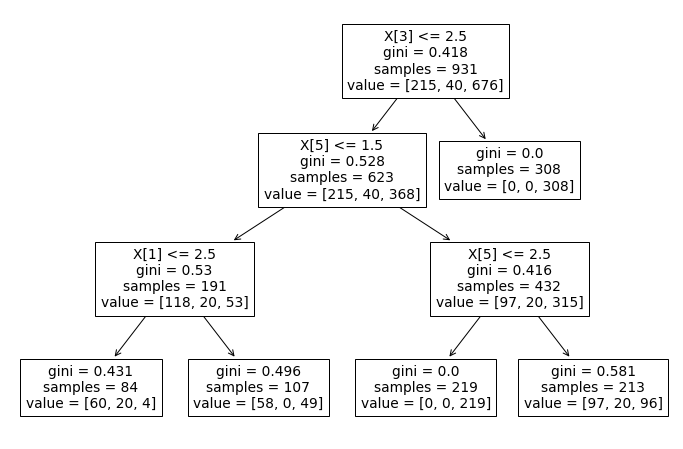

In [25]:
# 3.4 Decision Tree
from Model_Code.DecisionTree import DecisionTree
from sklearn.model_selection import train_test_split

# spilt data into training data and validation set.
x_train, x_valid, y_train, y_valid_DT = train_test_split(data.iloc[:, :-1], y, test_size = 0.3, random_state = 22)

result = DecisionTree(x_train, x_valid, y_train, y_valid_DT)
res_DT = result.get_result()

In [26]:
# 3.5 Logistic Regression
from Model_Code.LogisticRegression import LogRegression

lr = LogRegression(data, 'sag', 500,'ovr', 'balanced')
y_valid_LR = lr.spilt_data()
res_LR = lr.get_result()

print(res_LR)

-------Logistic_Regression Model-------
Done
['unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'unacc' 'unacc'
 'acc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'good'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'acc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'acc'
 'acc' 'acc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'good' 'unacc' 'unacc' 'acc' 'unacc'
 'good' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'acc' 'acc'
 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'good' 'unacc' 'unacc' 'acc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 

/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
# 3.6 SVM
from Model_Code.SVM import SVM

# as for strategy, the second parameter as input,
# either 'OVO' or 'OVR'.
s = SVM(data, 'OVO')
res_SVM_OVO = np.array(s.get_result())
y_valid_SVM_OVO = np.array(s.get_valid_y())
print(res_SVM_OVO)

s = SVM(data, 'OVR')
res_SVM_OVR = np.array(s.get_result())
y_valid_SVM_OVR = np.array(s.get_valid_y())
print(res_SVM_OVR)


-----------SVM Model-----------
-----------One VS One-----------

['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc'
 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'good' 'acc' 'acc' 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'good' 'unacc'
 'unacc' 'acc' 'unacc' 'good' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'acc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'good' 'unacc' 'good' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unac

In [28]:
# 3.7 GBDT
from Model_Code.GBDT import GBDT

# use train_test_split to separate training set into
# training data and validation data.
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid_GBDT = train_test_split(x, y, test_size = 0.3, random_state = 22) 

gbdt = GBDT(x_train, x_valid, y_train)
res_GBDT = gbdt.get_result()
print(res_GBDT)

-----------GBDT Model-----------
Done
['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'good' 'acc' 'acc' 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'good' 'unacc' 'unacc'
 'acc' 'unacc' 'good' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc'
 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'good' 'unacc' 'good' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'una

In [29]:
# 3.8 Random Forest
from Model_Code.RandomForest import RandomForest

# Make the label encoder
rf = RandomForest(data)
y_valid_RF = rf.get_valid_y()
res_RF = np.array(rf.get_result())

Best parameters: {'max_features': 6, 'n_estimators': 200}
--------Random_Forest Model--------
['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'good' 'acc' 'acc' 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'good' 'unacc' 'unacc'
 'acc' 'unacc' 'good' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc'
 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'good' 'unacc' 'good' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' '

In [30]:
# 3.9 XGBoost
from Model_Code.XGBoost import XGBoost

xgb = XGBoost(data)
xgb.spilt_data()
y_valid_XGBoost = np.array(xgb.get_valid_y())
res_XGBoost = xgb.get_result()

print(res_XGBoost)

--------XGBoost Model--------
[19:37:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Done
['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'good' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc'
 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'good' 'acc' 'acc' 'unacc' 'good' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'good' 'unacc'
 'unacc' 'acc' 'unacc' 'good' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'acc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unac

In [31]:
# 4 Model Validation

In [32]:
# import score, used to calculate criteria of each model.
from Model_Code.Score import Score

-------Confusion Matrix-------
[[ 77   3  12]
 [  7   7   1]
 [  9   1 282]]


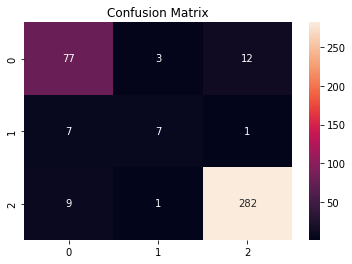


----------Accuracy----------
0.9172932330827067

-----------Recall-----------
Micro_Recall: 0.9172932330827067

Macro_Recall: 0.7564588710211105

Weighted_Recall: 0.9172932330827067

-----------F-Score-----------
Micro_F_Score: 0.9172932330827067

Macro_F_Score: 0.7772372293667013

Weighted_F_Score: 0.9153370433205456

----------Precision----------
Micro_Precision: 0.9172932330827067

Macro_Precision: 0.8067509430002596

Weighted_Precision: 0.9144102780602449



In [33]:
# 4.1 KNN
s_KNN = Score(y_valid_KNN, res_KNN)
s_KNN.calculate_all()

-------Confusion Matrix-------
[[ 64   3  25]
 [ 11   4   0]
 [ 12   1 279]]


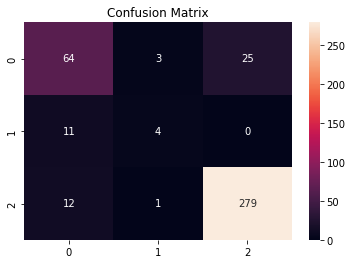


----------Accuracy----------
0.8696741854636592

-----------Recall-----------
Micro_Recall: 0.8696741854636592

Macro_Recall: 0.6392660975448349

Weighted_Recall: 0.8696741854636592

-----------F-Score-----------
Micro_F_Score: 0.8696741854636592

Macro_F_Score: 0.6663838321924862

Weighted_F_Score: 0.8631269452058271

----------Precision----------
Micro_Precision: 0.8696741854636592

Macro_Precision: 0.7177984472675942

Weighted_Precision: 0.8600626642225649



In [34]:
# 4.2 Bayes
s_Bayes = Score(y_valid_Bayes, res_Bayes)
s_Bayes.calculate_all()

-------Confusion Matrix-------
[[ 80   3   9]
 [  3  12   0]
 [ 10   2 280]]


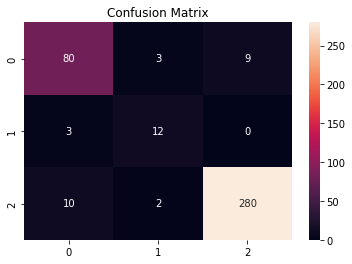


----------Accuracy----------
0.9323308270676691

-----------Recall-----------
Micro_Recall: 0.9323308270676691

Macro_Recall: 0.8761564423267818

Weighted_Recall: 0.9323308270676691

-----------F-Score-----------
Micro_F_Score: 0.9323308270676691

Macro_F_Score: 0.8595734288505373

Weighted_F_Score: 0.9329908538849566

----------Precision----------
Micro_Precision: 0.9323308270676691

Macro_Precision: 0.8449851793975022

Weighted_Precision: 0.9339212898115736



In [35]:
# 4.3 Perceptron
s_Perceptron = Score(y_valid_Perceptron, res_Perceptron)
s_Perceptron.calculate_all()

-------Confusion Matrix-------
[[ 92   0   0]
 [ 15   0   0]
 [ 52   0 240]]


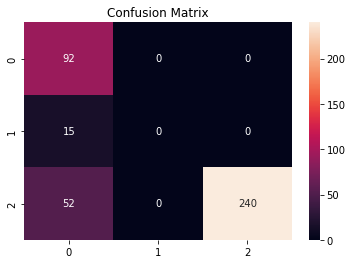


----------Accuracy----------
0.8320802005012531

-----------Recall-----------
Micro_Recall: 0.8320802005012531

Macro_Recall: 0.6073059360730594

Weighted_Recall: 0.8320802005012531

-----------F-Score-----------
Micro_F_Score: 0.8320802005012531

Macro_F_Score: 0.5451077893938032

Weighted_F_Score: 0.8293255080005978

----------Precision----------
Micro_Precision: 0.8320802005012531

Macro_Precision: 0.5262054507337526

Weighted_Precision: 0.8652448731892625



/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wendywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# 4.4 Decision Tree
s_DT = Score(y_valid_DT, res_DT)
s_DT.calculate_all()

-------Confusion Matrix-------
[[ 87   5   0]
 [  9   6   0]
 [ 23   3 266]]


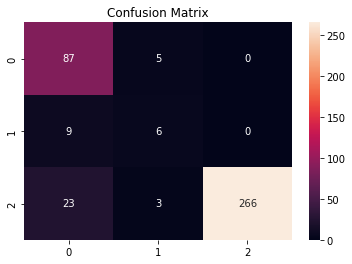


----------Accuracy----------
0.899749373433584

-----------Recall-----------
Micro_Recall: 0.899749373433584

Macro_Recall: 0.7522036926742107

Weighted_Recall: 0.899749373433584

-----------F-Score-----------
Micro_F_Score: 0.899749373433584

Macro_F_Score: 0.7306142237108185

Weighted_F_Score: 0.903429725220296

----------Precision----------
Micro_Precision: 0.899749373433584

Macro_Precision: 0.7198879551820728

Weighted_Precision: 0.9165139740106568



In [37]:
# 4.5 Logistic Regression
s_LR = Score(y_valid_LR, res_LR)
s_LR.calculate_all()

-------Confusion Matrix-------
[[ 92   0   0]
 [  0  15   0]
 [  5   2 285]]


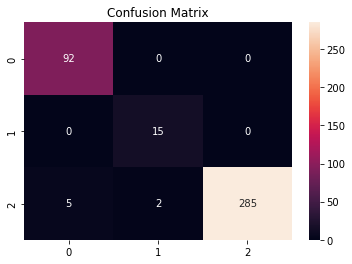


----------Accuracy----------
0.9824561403508771

-----------Recall-----------
Micro_Recall: 0.9824561403508771

Macro_Recall: 0.9920091324200913

Weighted_Recall: 0.9824561403508771

-----------F-Score-----------
Micro_F_Score: 0.9824561403508771

Macro_F_Score: 0.9663044192579143

Weighted_F_Score: 0.9826721217066122

----------Precision----------
Micro_Precision: 0.9824561403508771

Macro_Precision: 0.9436021831412976

Weighted_Precision: 0.9836917946777192



In [38]:
# 4.6.1 SVM-OVO
s_SVM_OVO = Score(y_valid_SVM_OVO, res_SVM_OVO)
s_SVM_OVO.calculate_all()

-------Confusion Matrix-------
[[ 91   1   0]
 [  3  12   0]
 [  7   2 283]]


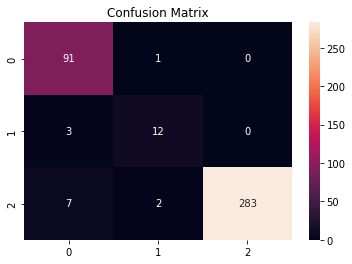


----------Accuracy----------
0.9674185463659147

-----------Recall-----------
Micro_Recall: 0.9674185463659147

Macro_Recall: 0.9194361723247965

Weighted_Recall: 0.9674185463659147

-----------F-Score-----------
Micro_F_Score: 0.9674185463659147

Macro_F_Score: 0.9091176691447022

Weighted_F_Score: 0.9678848167953111

----------Precision----------
Micro_Precision: 0.9674185463659147

Macro_Precision: 0.9003300330033004

Weighted_Precision: 0.9696518524032854



In [39]:
s_SVM_OVR = Score(y_valid_SVM_OVR, res_SVM_OVR)
s_SVM_OVR.calculate_all()

-------Confusion Matrix-------
[[ 92   0   0]
 [  3  12   0]
 [  8   2 282]]


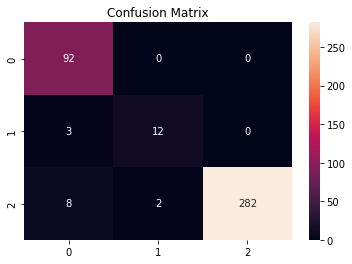


----------Accuracy----------
0.9674185463659147

-----------Recall-----------
Micro_Recall: 0.9674185463659147

Macro_Recall: 0.921917808219178

Weighted_Recall: 0.9674185463659147

-----------F-Score-----------
Micro_F_Score: 0.9674185463659147

Macro_F_Score: 0.9179181158996129

Weighted_F_Score: 0.9677617581447804

----------Precision----------
Micro_Precision: 0.9674185463659147

Macro_Precision: 0.9167822468793343

Weighted_Precision: 0.9700047622523715



In [40]:
# 4.7 GBDT
s_GBDT = Score(y_valid_GBDT, res_GBDT)
s_GBDT.calculate_all()

-------Confusion Matrix-------
[[ 91   0   1]
 [  2  13   0]
 [  7   2 283]]


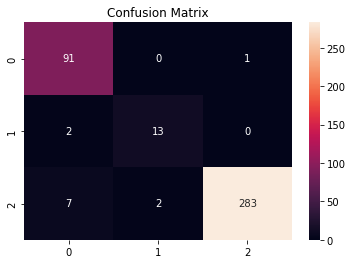


----------Accuracy----------
0.9699248120300752

-----------Recall-----------
Micro_Recall: 0.9699248120300752

Macro_Recall: 0.9416583945470188

Weighted_Recall: 0.9699248120300752

-----------F-Score-----------
Micro_F_Score: 0.9699248120300752

Macro_F_Score: 0.9324074074074075

Weighted_F_Score: 0.9702729044834308

----------Precision----------
Micro_Precision: 0.9699248120300752

Macro_Precision: 0.9243818466353678

Weighted_Precision: 0.9716587242754775



In [41]:
# 4.8 Random Forest
s_RF = Score(y_valid_RF, res_RF)
s_RF.calculate_all()

-------Confusion Matrix-------
[[ 91   1   0]
 [  2  13   0]
 [  6   2 284]]


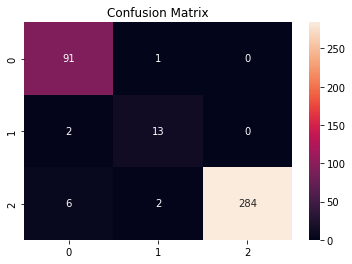


----------Accuracy----------
0.9724310776942355

-----------Recall-----------
Micro_Recall: 0.9724310776942355

Macro_Recall: 0.9427999470584343

Weighted_Recall: 0.9724310776942355

-----------F-Score-----------
Micro_F_Score: 0.9724310776942355

Macro_F_Score: 0.9259001232274328

Weighted_F_Score: 0.972907295919056

----------Precision----------
Micro_Precision: 0.9724310776942355

Macro_Precision: 0.9105639730639731

Weighted_Precision: 0.9743186881344776



In [42]:
# 4.9 XBGoost
s_xgb = Score(y_valid_XGBoost, res_XGBoost)
s_xgb.calculate_all()

In [43]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1325    unacc
1326    unacc
1327    unacc
1328    unacc
1329      acc
Name: evaluation, Length: 1330, dtype: object

--------SVM 1 Fold--------
-------Confusion Matrix-------
[[ 63   0   2]
 [  0  12   0]
 [  0   0 189]]


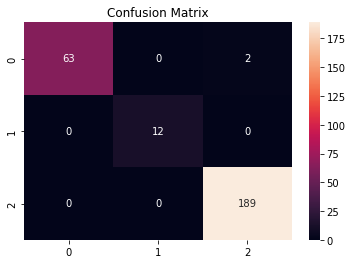


----------Accuracy----------
0.9924812030075187

-----------Recall-----------
Micro_Recall: 0.9924812030075187

Macro_Recall: 0.9897435897435898

Weighted_Recall: 0.9924812030075187

-----------F-Score-----------
Micro_F_Score: 0.9924812030075187

Macro_F_Score: 0.9930372807017545

Weighted_F_Score: 0.9924422487138901

----------Precision----------
Micro_Precision: 0.9924812030075187

Macro_Precision: 0.9965095986038395

Weighted_Precision: 0.9925599338660789

--------SVM 2 Fold--------
-------Confusion Matrix-------
[[ 54   2   0]
 [  0  12   0]
 [  0   0 198]]


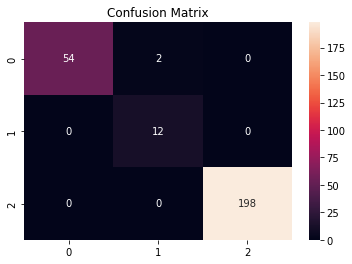


----------Accuracy----------
0.9924812030075187

-----------Recall-----------
Micro_Recall: 0.9924812030075187

Macro_Recall: 0.9880952380952381

Weighted_Recall: 0.9924812030075187

-----------F-Score-----------
Micro_F_Score: 0.9924812030075187

Macro_F_Score: 0.9682983682983682

Weighted_F_Score: 0.9927020348072981

----------Precision----------
Micro_Precision: 0.9924812030075187

Macro_Precision: 0.9523809523809524

Weighted_Precision: 0.9935553168635876

--------SVM 3 Fold--------
-------Confusion Matrix-------
[[ 67   0   0]
 [  2  11   0]
 [  0   1 185]]


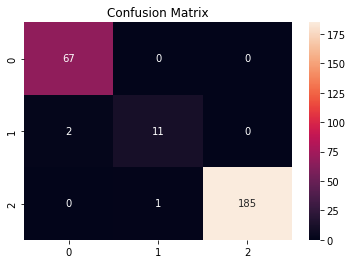


----------Accuracy----------
0.9887218045112782

-----------Recall-----------
Micro_Recall: 0.9887218045112782

Macro_Recall: 0.9469258340226082

Weighted_Recall: 0.9887218045112782

-----------F-Score-----------
Micro_F_Score: 0.9887218045112782

Macro_F_Score: 0.9541995666191004

Weighted_F_Score: 0.9885464592987145

----------Precision----------
Micro_Precision: 0.9887218045112782

Macro_Precision: 0.96256038647343

Weighted_Precision: 0.9886264574479678

--------SVM 4 Fold--------
-------Confusion Matrix-------
[[ 49   1   0]
 [  0   9   0]
 [  0   0 207]]


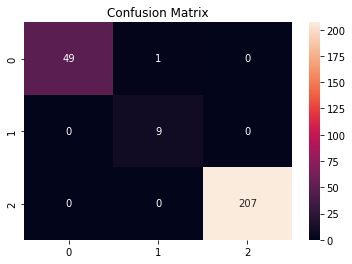


----------Accuracy----------
0.9962406015037594

-----------Recall-----------
Micro_Recall: 0.9962406015037594

Macro_Recall: 0.9933333333333333

Weighted_Recall: 0.9962406015037594

-----------F-Score-----------
Micro_F_Score: 0.9962406015037594

Macro_F_Score: 0.9790891369838738

Weighted_F_Score: 0.996320546182042

----------Precision----------
Micro_Precision: 0.9962406015037594

Macro_Precision: 0.9666666666666667

Weighted_Precision: 0.9966165413533835

--------SVM 5 Fold--------
-------Confusion Matrix-------
[[ 67   2   0]
 [  0   9   0]
 [  0   0 188]]


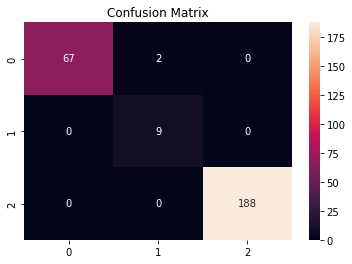


----------Accuracy----------
0.9924812030075187

-----------Recall-----------
Micro_Recall: 0.9924812030075187

Macro_Recall: 0.9903381642512077

Weighted_Recall: 0.9924812030075187

-----------F-Score-----------
Micro_F_Score: 0.9924812030075187

Macro_F_Score: 0.961764705882353

Weighted_F_Score: 0.9928018575851393

----------Precision----------
Micro_Precision: 0.9924812030075187

Macro_Precision: 0.9393939393939394

Weighted_Precision: 0.9938482570061518



In [44]:
# 5 SVM K-Fold Cross Validation.
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
for k, (train_index, valid_index) in enumerate(kf.split(data)):
    
    svm_cv = SVM(data, 'OVO')
    x = svm_cv.encode_data()
    x_train, x_valid, y_train, y_valid = x.values[train_index], x.values[valid_index],\
            y[train_index], list(y[valid_index])

    clt = svm_cv.svm_OneVsOne_fit(x_train, y_train)
    y_pred = svm_cv.predict(clt, x_valid)
    
    print('--------SVM {} Fold--------'.format(k + 1))
    Score(y_valid, y_pred).calculate_all()

In [61]:
# Prediction & Conclusion
# here, use SVM Model with OVO mode to do prediction.
import numpy as np
import pandas as pd
from Model_Code.SVM import SVM

data = pd.read_csv('Dataset/training.csv')
x_test = pd.read_csv('Dataset/test.csv')
x = data.drop(['evaluation'], axis = 1)
y = data['evaluation']

print('-----------SVM Model-----------')
# create SVM object.
# here, use whole training data to fit model.
s_pred = SVM(data, 'OVO')
# encode both training and testing data.
x = s_pred.encode_data()
# using OneHotEncoder to encode test data.
enc = OneHotEncoder()
enc.fit(x_test)
x_test_encoder = pd.DataFrame(enc.transform(x_test).toarray())
# fit SVM model.
clf = s_pred.svm_OneVsOne_fit(x, y)
# predict result.
y_test_pred = pd.DataFrame(s_pred.predict(clf, x_test_encoder))
print(y_test_pred)

-----------SVM Model-----------
         0
0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
..     ...
328  unacc
329  unacc
330    acc
331  unacc
332  unacc

[333 rows x 1 columns]


In [67]:
# save the result into csv file.
data_test_pred = pd.concat([x_test, y_test_pred], axis = 1)
# modify column name of y.
data_test_pred = data_test_pred.rename(columns = {0: 'evaluation'})
# save it into test.csv file.
data_test_pred.to_csv('Dataset/test_<SVM>.csv', index = False)